In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2026-01-05 07:46:03--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.250.4.207, 172.253.144.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  3.99MB/s    in 1.4s    

2026-01-05 07:46:05 (3.99 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

print("จำนวนข้อมูลทั้งหมด:", len(datastore))
print("\nKeys ที่มีในแต่ละ record:")
print(datastore[0].keys())

print("\nตัวอย่าง record แรก (raw):")
for k, v in datastore[1].items():
    print(f"{k}: {v}")

datastore[:100]



จำนวนข้อมูลทั้งหมด: 26709

Keys ที่มีในแต่ละ record:
dict_keys(['article_link', 'headline', 'is_sarcastic'])

ตัวอย่าง record แรก (raw):
article_link: https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365
headline: the 'roseanne' revival catches up to our thorny political mood, for better and worse
is_sarcastic: 0


[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [ ]:
print("Class 0 : NOT Sarcasm")
count = 0
for s, l in zip(sentences, labels):
    if l == 0:
        print("-", s)
        count += 1
        if count == 10:
            break

print("\nClass 1 : Sarcasm")
count = 0
for s, l in zip(sentences, labels):
    if l == 1:
        print("-", s)
        count += 1
        if count == 10:
            break


Class 0 : NOT Sarcasm
- former versace store clerk sues over secret black code for minority shoppers 
- the roseanne revival catches up to our thorny political mood  for better worse 
- j  k  rowling wishes snape happy birthday in the most magical way 
- advancing the worlds women 
- the fascinating case for eating lab  grown meat 
- this ceo will send your kids to school  if you work for his company 
- fridays morning email inside trumps presser for the ages 
- airline passengers tackle man who rushes cockpit in bomb threat 
- facebook reportedly working on healthcare features apps 
- north korea praises trump urges us voters to reject dull hillary 

Class 1 : Sarcasm
- mom starting to fear sons web series closest thing she will have to grandchild 
- boehner just wants wife to listen  not come up with alternative debt  reduction ideas 
- top snake handler leaves sinking huckabee campaign 
- nuclear bomb detonates during rehearsal for spider  man musical 
- cosby lawyer asks why accuse

In [ ]:
from collections import Counter


all_words = []
for sentence in sentences:
    all_words.extend(sentence.split())


word_counts = Counter(all_words)
total_unique_words = len(word_counts)

print(f"1. จำนวนคำศัพท์ที่ไม่ซ้ำกันทั้งหมด (Total Unique Words): {total_unique_words} คำ")

1. จำนวนคำศัพท์ที่ไม่ซ้ำกันทั้งหมด (Total Unique Words): 26188 คำ


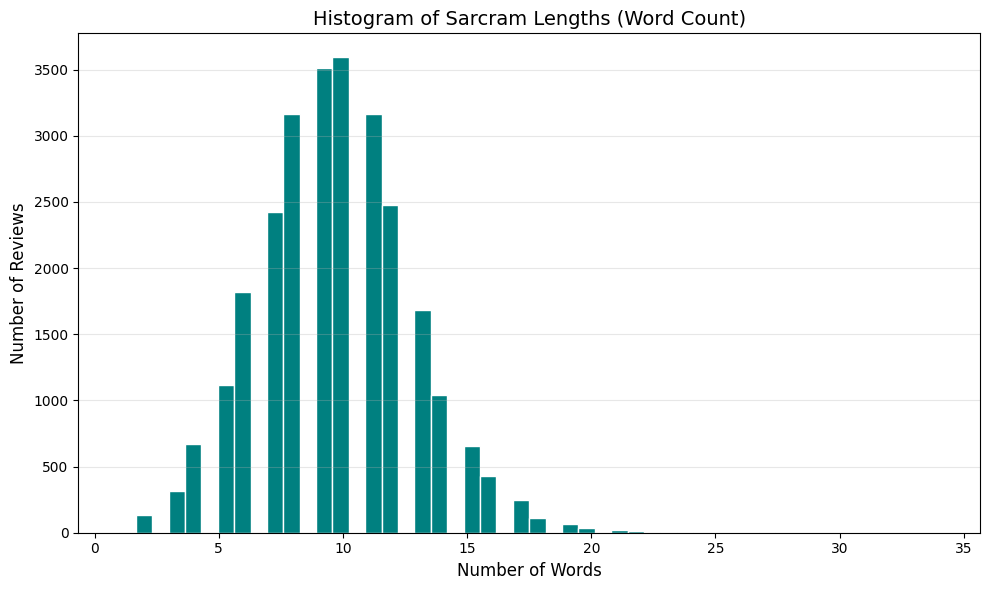

ค่าเฉลี่ย (Mean): 9.63 คำ
ค่ากลาง (Median): 10.0 คำ


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


sentence_lengths = [len(s.split()) for s in sentences]


plt.figure(figsize=(10, 6))


plt.hist(sentence_lengths, bins=50, color='teal', edgecolor='white')

plt.title("Histogram of Sarcram Lengths (Word Count)", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()


print(f"ค่าเฉลี่ย (Mean): {np.mean(sentence_lengths):.2f} คำ")
print(f"ค่ากลาง (Median): {np.median(sentence_lengths)} คำ")

In [ ]:
vocab_size = 2000
embedding_dim = 7
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 24000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded[2]

array([136, 841,   2, 796, 985,   1, 600,   1, 200, 133,  31,  40,   2,
         1,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
wc=tokenizer.word_counts
print(wc)

OrderedDict({'former': 96, 'versace': 1, 'store': 47, 'clerk': 9, 'sues': 16, 'over': 440, 'secret': 83, 'black': 248, 'code': 19, 'for': 2959, 'minority': 13, 'shoppers': 3, 'the': 4881, 'roseanne': 3, 'revival': 10, 'catches': 10, 'up': 758, 'to': 7402, 'our': 162, 'thorny': 3, 'political': 77, 'mood': 13, 'better': 107, 'worse': 35, 'mom': 174, 'starting': 41, 'fear': 43, 'sons': 36, 'web': 17, 'series': 55, 'closest': 5, 'thing': 133, 'she': 177, 'will': 502, 'have': 439, 'grandchild': 2, 'boehner': 26, 'just': 528, 'wants': 126, 'wife': 77, 'listen': 21, 'not': 668, 'come': 94, 'with': 1609, 'alternative': 13, 'debt': 23, 'reduction': 4, 'ideas': 37, 'j': 42, 'k': 41, 'rowling': 5, 'wishes': 35, 'snape': 2, 'happy': 53, 'birthday': 58, 'in': 3817, 'most': 236, 'magical': 27, 'way': 246, 'advancing': 2, 'worlds': 85, 'women': 301, 'fascinating': 4, 'case': 81, 'eating': 66, 'lab': 8, 'grown': 17, 'meat': 26, 'this': 815, 'ceo': 62, 'send': 33, 'your': 577, 'kids': 172, 'school': 21

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'on': 7, 'with': 8, 'is': 9, 'new': 10, 'trump': 11, 'man': 12, 'from': 13, 'you': 14, 'by': 15, 'this': 16, 'up': 17, 'out': 18, 'be': 19, 'how': 20, 'that': 21, 'it': 22, 'not': 23, 'your': 24, 'what': 25, 'his': 26, 'who': 27, 'just': 28, 'he': 29, 'has': 30, 'will': 31, 'more': 32, 'one': 33, 'into': 34, 'year': 35, 'report': 36, 'why': 37, 'area': 38, 'over': 39, 'have': 40, 'donald': 41, 'u': 42, 'day': 43, 's': 44, 'says': 45, 'can': 46, 'woman': 47, 'first': 48, 'time': 49, 'its': 50, 'like': 51, 'no': 52, 'get': 53, 'her': 54, 'trumps': 55, 'old': 56, 'off': 57, 'i': 58, 'now': 59, 'people': 60, 'life': 61, 'obama': 62, 'house': 63, 'white': 64, 'women': 65, 'than': 66, 'make': 67, 'was': 68, 'back': 69, 'still': 70, 'down': 71, 'my': 72, 'clinton': 73, 'we': 74, 'if': 75, '5': 76, 'world': 77, 'when': 78, 'years': 79, 'could': 80, 'americans': 81, 'black': 82, 'do': 83, 'way': 84, 'family': 85, 'before': 86, 'they': 

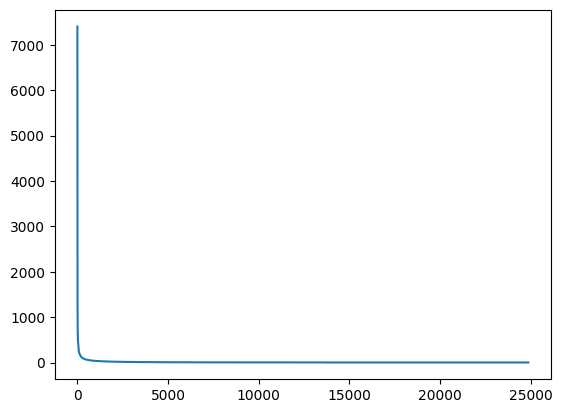

36
19


In [ ]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
#plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [ ]:
print(ys[3125])
print(ys[10000])
print(ys[12156])

11
2
2


In [ ]:

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# adam = tf.keras.optimizers.Adam(learning_rate=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 150
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    training_padded,
    training_labels,
    epochs=150,
    validation_data=(testing_padded, testing_labels),
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/150
750/750 - 8s - 10ms/step - accuracy: 0.7624 - loss: 0.8356 - val_accuracy: 0.8143 - val_loss: 0.4184
Epoch 2/150
750/750 - 5s - 7ms/step - accuracy: 0.8374 - loss: 0.3869 - val_accuracy: 0.8254 - val_loss: 0.3938
Epoch 3/150
750/750 - 5s - 7ms/step - accuracy: 0.8475 - loss: 0.3649 - val_accuracy: 0.8103 - val_loss: 0.4135
Epoch 4/150
750/750 - 5s - 7ms/step - accuracy: 0.8565 - loss: 0.3484 - val_accuracy: 0.8247 - val_loss: 0.3947
Epoch 5/150
750/750 - 5s - 7ms/step - accuracy: 0.8590 - loss: 0.3398 - val_accuracy: 0.8184 - val_loss: 0.4067
Epoch 6/150
750/750 - 5s - 7ms/step - accuracy: 0.8623 - loss: 0.3327 - val_accuracy: 0.8199 - val_loss: 0.4083
Epoch 7/150
750/750 - 5s - 7ms/step - accuracy: 0.8681 - loss: 0.3227 - val_accuracy: 0.8158 - val_loss: 0.4378
Epoch 8/150
750/750 - 5s - 7ms/step - accuracy: 0.8712 - loss: 0.3149 - val_accuracy: 0.8199 - val_loss: 0.4151
Epoch 9/150
750/750 - 5s - 7ms/step - accuracy: 0.8768 - loss: 0.3043 - val_accuracy: 0.8202 - val_loss

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# acc = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# print(f"Accuracy  : {acc:.4f}")
# print(f"Precision : {precision:.4f}")
# print(f"Recall    : {recall:.4f}")
# print(f"F1-score  : {f1:.4f}")


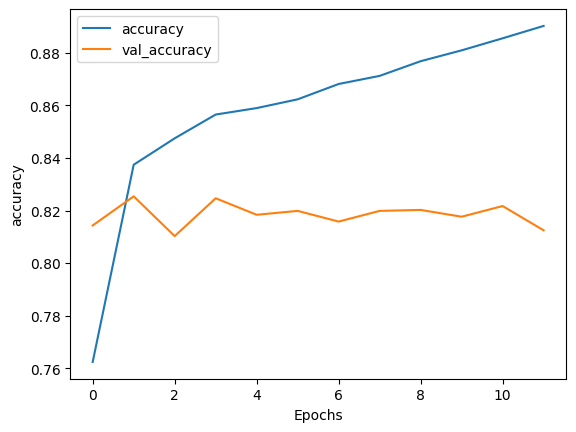

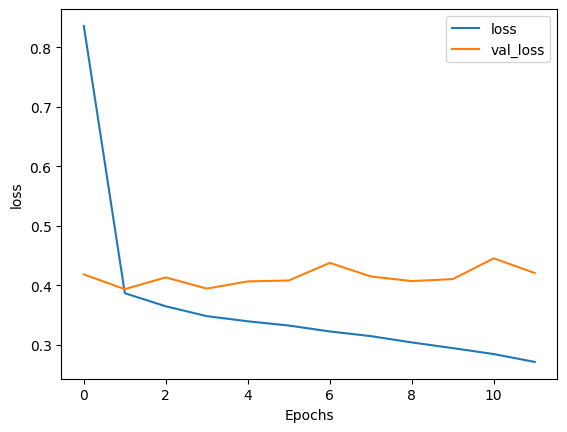

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear sons <OOV> series <OOV> thing she will have to <OOV> ? ? ? ? ? ?
mom starting to fear sons web series closest thing she will have to grandchild 
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(2000, 7)


In [ ]:
print(reverse_word_index[2])
print(weights[2])

to
[ 0.04256446 -0.00802715 -0.09534902  0.07100877 -0.03412401  0.04508194
  0.00900284]


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_sentences = [
    "Oh great, another meeting that could have been an email.",
    "It's a beautiful sunny day.",
    "I just love it when my code crashes right before the deadline.",
    "Yeah, because staying up all night is exactly how I wanted to spend my weekend.",
    "Oh sure, I love waiting in line for two hours."
]

sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded)

for s, p in zip(test_sentences, predictions):
    print(f"{p[0]:.3f} = {s}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
0.363 = Oh great, another meeting that could have been an email.
0.530 = It's a beautiful sunny day.
0.105 = I just love it when my code crashes right before the deadline.
0.064 = Yeah, because staying up all night is exactly how I wanted to spend my weekend.
0.755 = Oh sure, I love waiting in line for two hours.
